In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import scipy.optimize as opt
import os
import importlib

user_path = '/Users/oliviapereira/Desktop' if (os.path.isdir('/Users/oliviapereira')) else '/Users/audrey/Documents/PHYS469'

In [2]:
# constants
csts = dict()
csts['k'] = 1.380649e-23  # J/K
csts['A'] = 3.15*0.92*1e-6  # m
csts['L'] = 10.00e-3  # m

# Interpolating over calibration data

In [3]:
def v_to_mag(v_to_convert):
    calib_raw = pd.read_excel('magnet_calibration.xlsx')
    voltage = calib_raw['Hall Probe Reading'].values[2:]
    field = calib_raw['Magnetic Flux Reading'].values[2:]

    func = interp1d(voltage, field, bounds_error=False, fill_value="extrapolate")
    field_interp = func(v_to_convert)
    return field_interp

## Interpolating over time-series data (same time axis)

In [4]:
# defining the common temperature array we want to interpolate
T_common = np.linspace(-100, 80, 1000) # Celcius

In [5]:
def interp_data(dataset, T_common):
    interp_dataset = dict()
    # interpolating over time
    common_time = dataset["t9"]  # using time of temperature readings

    for i in range(1, 8):
        interp_data = interp1d(dataset[f't{i}'], dataset[f'v{i}'], bounds_error=False, fill_value="extrapolate")
        interp_dataset[f'v{i}'] = interp_data(common_time)

    # interpolating over temperature
    for i in range(1, 8):
        interp_data = interp1d(dataset['T'], dataset[f'v{i}'], bounds_error=False, fill_value="extrapolate")
        interp_dataset[f'v{i}'] = interp_data(T_common)

    interp_dataset['T_original'] = dataset['T']
    interp_dataset['T_common'] = T_common
    return interp_dataset

In [27]:
# read the files listed in the .txt and interpolate them
mag_field_dict = dict()
file_list = user_path + '/PHYS469/hall_experiment/good_data_list.txt'

with open(file_list, 'r') as f:
    for line in f:
        line = line.strip()
        dataset = pd.read_csv(user_path + line, header=2)

        field_voltage = float(line.split('/')[-1].split('.')[0][:-2])
        field_strength = v_to_mag(field_voltage)

        run_dict = interp_data(dataset, T_common)

        mag_field_dict[str(field_strength)] = run_dict


In [34]:
mag_field_dict.keys()

dict_keys(['275.7', '0.6000000000000014', '559.3', '191.9', '325.2', '406.8', '489.2'])

In [28]:
mag_field_dict['275.7'].keys()

dict_keys(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'T_original', 'T_common'])

TypeError: Invalid shape (1000,) for image data

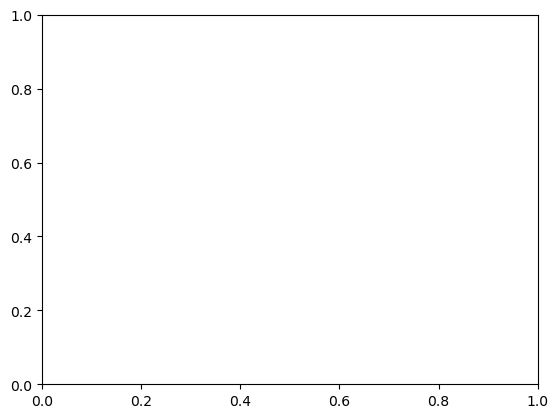

In [35]:
list = [mag_field_dict['191.9']['v1'], mag_field_dict['275.7']['v1']]
new_array = np.array([v_B for v_B in list])

plt.imshow(mag_field_dict['275.7']['v1'], aspect='auto', cmap='viridis')